# Part A>>>> Linear regression model with result
 


# 

 Import Libraries

# 1.1(a)

In [2]:
import numpy as np# numpy is library
import pandas as pd# pandas is library
import matplotlib.pyplot as plt# here matplotlib is library and pyplot is module


Import dataset

In [3]:
bike_data= pd.read_csv("/Users/satyarth/Downloads/bike_share_.csv")# declare variable and store the data set
# here read_csv is function from pandas library
bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
bike_data_temp_and_cnt=bike_data[["temp","cnt"]]
bike_data_temp_and_cnt

,temp,cnt
0,0.344167,985
1,0.363478,801
2,0.196364,1349
3,0.200000,1562
4,0.226957,1600
...,...,...
726,0.254167,2114
727,0.253333,3095
728,0.253333,1341
729,0.255833,1796


# 1.1(b) 
 
 scatter plot between temp and cnt

<AxesSubplot:xlabel='temp', ylabel='cnt'>

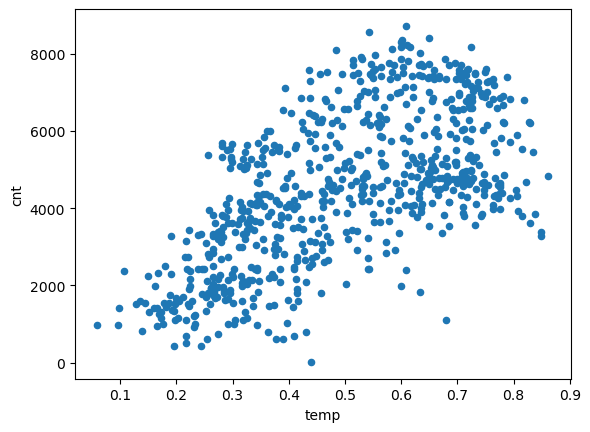

In [5]:
bike_data_temp_and_cnt.plot(x='temp',y='cnt',kind='scatter')

# 1.1(c)

prediction of model

In [6]:
X_trn= bike_data_temp_and_cnt['temp'].values
X_trn# Feature variable
X_trn.shape

(731,)

In [7]:
Y_trn=bike_data_temp_and_cnt['cnt'].values# we added values keyword ,we want data in numpy array
Y_trn#response variable

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2077, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425,
       1536, 1685, 2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455,
       2895, 3348, 2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944,
       4189, 1683, 4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351,
       4401, 4451, 2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864,
       4105, 3409, 4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274,
       4492, 4978, 4677, 4679, 4758, 4788, 4098, 39

Split data set into training and testing data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_trn, Y_trn, test_size=0.3, random_state = 1)


/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
X_trains=X_train.reshape(-1,1)# we have used reshape function here because we have single feature i.e."temp".
X_trains
# please note-Reshape your data either using array.reshape(-1, 1) if your data has a
#single feature or array.reshape(1, -1) if it contains a single sample.

array([[0.589167 ],
       [0.5775   ],
       [0.545    ],
       [0.590833 ],
       [0.4      ],
       [0.464167 ],
       [0.173333 ],
       [0.654167 ],
       [0.484167 ],
       [0.3      ],
       [0.54     ],
       [0.719167 ],
       [0.216522 ],
       [0.3575   ],
       [0.650833 ],
       [0.326667 ],
       [0.818333 ],
       [0.325    ],
       [0.408333 ],
       [0.298333 ],
       [0.458333 ],
       [0.731667 ],
       [0.311667 ],
       [0.755    ],
       [0.635833 ],
       [0.715833 ],
       [0.296667 ],
       [0.728333 ],
       [0.4675   ],
       [0.3775   ],
       [0.681667 ],
       [0.469167 ],
       [0.410833 ],
       [0.710833 ],
       [0.626667 ],
       [0.489167 ],
       [0.441667 ],
       [0.531667 ],
       [0.150833 ],
       [0.320833 ],
       [0.341667 ],
       [0.755833 ],
       [0.728333 ],
       [0.655833 ],
       [0.520833 ],
       [0.769167 ],
       [0.204348 ],
       [0.719167 ],
       [0.781667 ],
       [0.541667 ],


In [10]:
Y_trains =Y_train.reshape(-1,1)
Y_trains

array([[2913],
       [3958],
       [6153],
       [4639],
       [4109],
       [6824],
       [1301],
       [4127],
       [3894],
       [2227],
       [2710],
       [7605],
       [1096],
       [5566],
       [4763],
       [3623],
       [6786],
       [3613],
       [4205],
       [5191],
       [6304],
       [7499],
       [2999],
       [4586],
       [4549],
       [7446],
       [5260],
       [7040],
       [3267],
       [4186],
       [4679],
       [4579],
       [5557],
       [7498],
       [5180],
       [5585],
       [2703],
       [6230],
       [1321],
       [5008],
       [3053],
       [6685],
       [5225],
       [7421],
       [6778],
       [5464],
       [1606],
       [5302],
       [6904],
       [6436],
       [4539],
       [4068],
       [6883],
       [4990],
       [1530],
       [6869],
       [4046],
       [6530],
       [4460],
       [1891],
       [4433],
       [1605],
       [1600],
       [1550],
       [5633],
       [5409],
       [28

Traing the simple linear regression model on training set

predicting the test set result

In [11]:
X_tests= X_test.reshape(-1,1)
Y_tests=Y_test.reshape(-1,1)
Y_tests.shape

(220, 1)

In [12]:
from sklearn.linear_model import LinearRegression
#here sklearn is library and linear_model is module which contains LinearRegression class
regressor= LinearRegression()# here we have created object named'regressor' of class LinearRegression.

#here model is ready to use
regressor.fit(X_trains,Y_trains)# will train model based on training set

LinearRegression()

In [13]:
Y_predict_train=regressor.predict(X_trains)

In [15]:
Y_predict_test=regressor.predict(X_tests)
Y_predict_test.shape
Y_predict_test

array([[3069.43891689],
       [3000.75684009],
       [6514.21311004],
       [3714.01573791],
       [5763.97253088],
       [5441.68729041],
       [3170.05597207],
       [5658.30243266],
       [4073.28265972],
       [5531.50085082],
       [4252.92246071],
       [3396.09247185],
       [2266.36011857],
       [3988.75038519],
       [5505.08808133],
       [2070.87645994],
       [5806.24183818],
       [4596.33918479],
       [4506.52562438],
       [5182.79650078],
       [3080.00782873],
       [5811.52312407],
       [5774.54144273],
       [3164.54010326],
       [5985.87529909],
       [3212.09069645],
       [6419.11192367],
       [3634.76474926],
       [3159.25881738],
       [4152.53364837],
       [3131.46391064],
       [3180.39030099],
       [3523.81336516],
       [3074.72020277],
       [6635.733406  ],
       [4775.97898578],
       [2006.78650242],
       [3444.56237651],
       [6271.17885822],
       [3391.72415736],
       [4955.61244668],
       [5425.837

# 1.1(d)

draw the regression line with scatter plot

<function matplotlib.pyplot.show(close=None, block=None)>

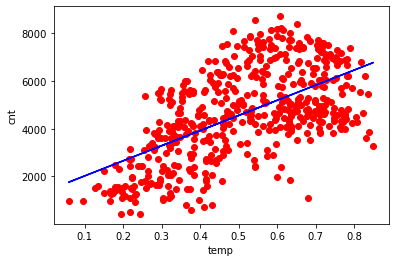

In [118]:
plt.scatter(X_trains, Y_trains,color='red')
plt.plot(X_trains, regressor.predict(X_trains),color='blue')
plt.xlabel("temp")
plt.ylabel("cnt")
plt.show

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_tests, Y_predict_test)
r_squared = r2_score(Y_tests, Y_predict_test)
r_squared

0.4644266119535889

# 1.1(e)

calculate R squared

In [38]:
r_squared_train =r2_score(Y_train,Y_predict_train)

In [39]:
r_squared_train

0.35186045604275906

Visualize the test set result based on training data set model

<function matplotlib.pyplot.show(close=None, block=None)>

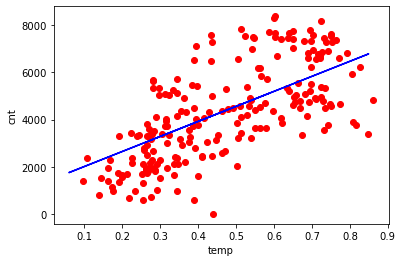

In [113]:
plt.scatter(X_tests, Y_tests,color='red')
plt.plot(X_trains, regressor.predict(X_trains),color='blue')
plt.xlabel("temp")
plt.ylabel("cnt")
plt.show

# Part B>>>>Multiple linear regression model with result



# 2.1(a)

In [41]:
multiple_linear_regression=bike_data.iloc[:,[9,10,11,12,15]]
multiple_linear_regression



,temp,atemp,hum,windspeed,cnt
0,0.344167,0.363625,0.805833,0.160446,985
1,0.363478,0.353739,0.696087,0.248539,801
2,0.196364,0.189405,0.437273,0.248309,1349
3,0.200000,0.212122,0.590435,0.160296,1562
4,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133,2114
727,0.253333,0.255046,0.590000,0.155471,3095
728,0.253333,0.242400,0.752917,0.124383,1341
729,0.255833,0.231700,0.483333,0.350754,1796


In [42]:


feature_columns = multiple_linear_regression.drop(['cnt'], axis=1)
feature_columns

,temp,atemp,hum,windspeed
0,0.344167,0.363625,0.805833,0.160446
1,0.363478,0.353739,0.696087,0.248539
2,0.196364,0.189405,0.437273,0.248309
3,0.200000,0.212122,0.590435,0.160296
4,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133
727,0.253333,0.255046,0.590000,0.155471
728,0.253333,0.242400,0.752917,0.124383
729,0.255833,0.231700,0.483333,0.350754


In [43]:
X_multiple=feature_columns
X_multiple


,temp,atemp,hum,windspeed
0,0.344167,0.363625,0.805833,0.160446
1,0.363478,0.353739,0.696087,0.248539
2,0.196364,0.189405,0.437273,0.248309
3,0.200000,0.212122,0.590435,0.160296
4,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133
727,0.253333,0.255046,0.590000,0.155471
728,0.253333,0.242400,0.752917,0.124383
729,0.255833,0.231700,0.483333,0.350754


In [44]:
Y_multiple=multiple_linear_regression.cnt
Y_multiple

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

Split data into training and testing set

In [45]:
X_train_multiple,X_test_multiple,Y_train_multiple,Y_test_multiple = train_test_split(X_multiple,Y_multiple,test_size=0.3,random_state=1)

In [46]:
X_train_multiple

,temp,atemp,hum,windspeed
285,0.589167,0.551804,0.896667,0.141787
135,0.577500,0.550512,0.787917,0.126871
443,0.545000,0.532821,0.728750,0.162317
640,0.590833,0.542333,0.871667,0.104475
312,0.400000,0.409079,0.758333,0.062196
...,...,...,...,...
645,0.415833,0.419813,0.708333,0.141162
715,0.362500,0.369938,0.838750,0.100742
72,0.325217,0.332000,0.496957,0.136926
235,0.673333,0.630692,0.605000,0.253108


In [47]:
Y_train_multiple

285    2913
135    3958
443    6153
640    4639
312    4109
       ... 
645    3510
715    3786
72     2046
235    5130
37     1712
Name: cnt, Length: 511, dtype: int64

# 2.2(b)

train the model  (I have splitted data into training and testing)

In [48]:
multiple_regression_model=LinearRegression()

In [49]:
multiple_regression_model.fit(X_train_multiple,Y_train_multiple)

LinearRegression()

In [54]:
Y_multiple_predict=multiple_regression_model.predict(X_train_multiple)
Y_multiple_predict

array([4382.00703351, 4810.31607943, 4719.04681004, 4583.24293714,
       4153.67104594, 4932.89264406, 1544.43073535, 4868.71515723,
       4384.3681073 , 2690.18073328, 3249.7429317 , 6482.94591387,
       3076.06663208, 3686.61259503, 5413.46719347, 2779.96596438,
       7361.39516526, 3086.09988685, 4282.77282555, 3329.89694065,
       4832.43530804, 6962.38462723, 3632.27060098, 6510.10893006,
       5640.4192638 , 6419.56545599, 3571.12294293, 5986.07568647,
       5109.72390376, 4067.76402531, 5418.38832629, 4903.31136209,
       3796.17886678, 6715.65815067, 6029.42595291, 4917.14844838,
       4142.97309815, 4582.2004439 , 2609.29619951, 3226.99407495,
       3159.18250663, 6375.08429826, 6041.28437908, 5037.33671829,
       5165.08684466, 5858.73118925, 3616.10538743, 5812.95940922,
       6704.79247701, 5554.73538329, 4890.65273328, 4027.06226694,
       6460.0091417 , 4427.81907544, 2167.39232307, 4908.709411  ,
       3682.97307316, 5325.30455432, 5475.22446937, 2556.54021

In [55]:
for idx, col_name in enumerate(X_train_multiple.columns):
    print("Coefficeint of {} is {}".format(col_name, multiple_regression_model.coef_[idx]))

Coefficeint of temp is 1339.9531682831428
Coefficeint of atemp is 5719.2523886102745
Coefficeint of hum is -3545.337996327665
Coefficeint of windspeed is -4409.764448730693


In [56]:
print("Intercept: ", multiple_regression_model.intercept_)

Intercept:  4240.879357217434


# 2.2(c)

predict number of sales

In [57]:
test_input =[[0.34416,0.363625,0.805833,0.16044]]
print(f'Predicted sales for bikes: {multiple_regression_model.predict(test_input)}')

Predicted sales for bikes: [3217.24782767]


/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 2.2(d)

calculate mean squared error

In [58]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_train_multiple,Y_multiple_predict)

2020068.1822732436

# 2.2(e)

plot the histrogram of residuals

In [59]:
histrogram=np.subtract (Y_train_multiple,Y_multiple_predict)
histrogram

285   -1469.007034
135    -852.316079
443    1433.953190
640      55.757063
312     -44.671046
          ...     
645    -555.321538
715     361.519564
72    -2163.754758
235    -359.124623
37    -1811.717211
Name: cnt, Length: 511, dtype: float64

(array([  2.,   3.,  32.,  82., 100., 110.,  60.,  79.,  32.,  11.]),
 array([-4342.32101626, -3548.53350589, -2754.74599552, -1960.95848515,
        -1167.17097478,  -373.38346441,   420.40404596,  1214.19155633,
         2007.9790667 ,  2801.76657707,  3595.55408744]),
 <BarContainer object of 10 artists>)

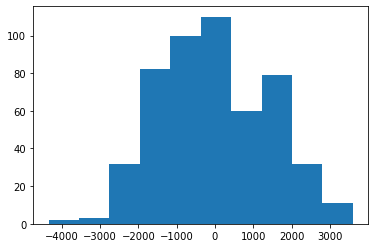

In [60]:
plt.hist(histrogram)

In [61]:
X_multiple_for_r_square, y_multiple_for_r_square = X_train_multiple[['temp','atemp','hum','windspeed']], Y_train_multiple
multiple_regression_model.score(X_multiple_for_r_square, y_multiple_for_r_square)

0.4375311039148434

In [62]:
adjusted_R_square=1 - (1-multiple_regression_model.score(X_multiple_for_r_square, y_multiple_for_r_square))*(len(y_multiple_for_r_square )-1)/(len(y_multiple_for_r_square )-X_multiple_for_r_square.shape[1]-1)
adjusted_R_square

0.4330847094793876

# Part c>>>>Non-linear regression model with results

# 1.3 a

In [75]:
variable=bike_data['temp']#stored 'temp' data set to variable
variable_new=variable.values#converted in array
variable_new_1 =variable_new.reshape(-1,1)
variable_new_1# will give bike data set



array([[0.344167 ],
       [0.363478 ],
       [0.196364 ],
       [0.2      ],
       [0.226957 ],
       [0.204348 ],
       [0.196522 ],
       [0.165    ],
       [0.138333 ],
       [0.150833 ],
       [0.169091 ],
       [0.172727 ],
       [0.165    ],
       [0.16087  ],
       [0.233333 ],
       [0.231667 ],
       [0.175833 ],
       [0.216667 ],
       [0.292174 ],
       [0.261667 ],
       [0.1775   ],
       [0.0591304],
       [0.0965217],
       [0.0973913],
       [0.223478 ],
       [0.2175   ],
       [0.195    ],
       [0.203478 ],
       [0.196522 ],
       [0.216522 ],
       [0.180833 ],
       [0.192174 ],
       [0.26     ],
       [0.186957 ],
       [0.211304 ],
       [0.233333 ],
       [0.285833 ],
       [0.271667 ],
       [0.220833 ],
       [0.134783 ],
       [0.144348 ],
       [0.189091 ],
       [0.2225   ],
       [0.316522 ],
       [0.415    ],
       [0.266087 ],
       [0.318261 ],
       [0.435833 ],
       [0.521667 ],
       [0.399167 ],


In [65]:
variable_2= np.square(variable)
variable_2#created temp_2 variable

0      0.118451
1      0.132116
2      0.038559
3      0.040000
4      0.051509
         ...   
726    0.064601
727    0.064178
728    0.064178
729    0.065451
730    0.046584
Name: temp, Length: 731, dtype: float64

# 1.3(b) 
plot the model (This is one method to predict.I have used another method to predict model which is mentioned after this method)

In [87]:
from sklearn.preprocessing import PolynomialFeatures# here sklearn is library , preprocessing is module 
#Under preprocessing module,polynomial feature is class 
non_linear_regressor=PolynomialFeatures(degree=2)# we want to create polynomial model of degree 2 , so here degree=2
# non_linear_regressor is object of PolynomialFeature class

x_non_linear= non_linear_regressor.fit_transform(variable_new_1)
# here we create matrix of variable_new_1 with variable_2(transformed from variable_new_1)


non_linear_regression=LinearRegression()# here we are building model
non_linear_regression.fit(x_non_linear,Y_multiple)# we called Y_multiple from multiple linear regression part
print("coefficients are:{}".format(non_linear_regression.coef_))
print("intercept is:{}".format(non_linear_regression.intercept_))

coefficients are:[     0.          21406.93130299 -15055.02538698]
intercept is:-1901.9557177350407


# 1.3 (c)

plot the model(I have plotted in 2-d in this method but plotted in 3-d in second method)

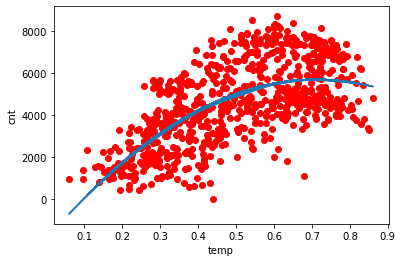

In [82]:
plt.scatter(variable_new_1,Y_multiple,color='red')
plt.plot(variable_new_1,non_linear_regression.predict(x_non_linear))
# here under predict(x_non_linear) ,we are getting predicted values of both variable_new_1 and variable_2
plt.xlabel('temp')
plt.ylabel('cnt')         
plt.show()         

# 1.3 (d) 

calculate the r squared

In [68]:
Y_predict_non_linear= non_linear_regression.predict(x_non_linear)

In [69]:
r_squared_non_linear =r2_score(Y_multiple,Y_predict_non_linear)
r_squared_non_linear# if we compare with R^2 of multiple linear model, R^2 for non linear explains little better the model.

0.4531790254908288

# Second method to calculate non linear model

In [95]:
X_p,Y_p=np.vstack([variable_new,variable_2]).T,Y_multiple
non_linear_regressor_second= LinearRegression().fit(X_p,Y_p)
print("R_squared:{}".format(non_linear_regressor_second.score(X_p,Y_p)))
print("coefficients:{}".format(non_linear_regressor_second.coef_))
print("intercept:{}".format(non_linear_regressor_second.intercept_))


R_squared:0.4531790254908288
coefficients:[ 21406.93130299 -15055.02538698]
intercept:-1901.9557177350416


In [101]:
x_grid, y_grid=np.meshgrid(X_p[:,0],X_p[:,1])
x_grid,y_grid

(array([[0.344167, 0.363478, 0.196364, ..., 0.253333, 0.255833, 0.215833],
        [0.344167, 0.363478, 0.196364, ..., 0.253333, 0.255833, 0.215833],
        [0.344167, 0.363478, 0.196364, ..., 0.253333, 0.255833, 0.215833],
        ...,
        [0.344167, 0.363478, 0.196364, ..., 0.253333, 0.255833, 0.215833],
        [0.344167, 0.363478, 0.196364, ..., 0.253333, 0.255833, 0.215833],
        [0.344167, 0.363478, 0.196364, ..., 0.253333, 0.255833, 0.215833]]),
 array([[0.11845092, 0.11845092, 0.11845092, ..., 0.11845092, 0.11845092,
         0.11845092],
        [0.13211626, 0.13211626, 0.13211626, ..., 0.13211626, 0.13211626,
         0.13211626],
        [0.03855882, 0.03855882, 0.03855882, ..., 0.03855882, 0.03855882,
         0.03855882],
        ...,
        [0.06417761, 0.06417761, 0.06417761, ..., 0.06417761, 0.06417761,
         0.06417761],
        [0.06545052, 0.06545052, 0.06545052, ..., 0.06545052, 0.06545052,
         0.06545052],
        [0.04658388, 0.04658388, 0.0465838

In [102]:
z=non_linear_regressor_second.intercept_+x_grid*non_linear_regressor_second.coef_[0]+y_grid*non_linear_regressor_second.coef_[1]

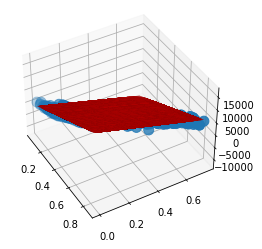

In [112]:
fig=plt.figure()
axes_in_three_D= plt.axes(projection='3d')
axes_in_three_D.plot_surface(x_grid,y_grid,z,rstride=1,cstride=1,alpha=0.3,color='r')
axes_in_three_D.scatter(X_p[:,0],X_p[:,1],Y_p,s=100)
axes_in_three_D.view_init(40,-30)